<span style="color:red">***Introduction***</span>

In this repo, I aim to analyze data from different sources (The World Bank, The World Values Survey, etc..) to answer the age-old question: does wealth really make you happier?

In this first Jupyter Notebook, we will be analyzing data from The World Bank on GDP per capita Purchasing Power Adjusted (PPP) (which will be used as a proxy for average wealth in a country) and Happiness Scores by country from the WVS. All the sources for the data will be linked in the README.

**Small Note**: The data used for GDP per capita is adjusted for purchasing power, that way it can be a more accurate representation of actual wealth in each country. As such, many of the values you will see for GDP per capita will be higher than you would expect.

<span style="color:red">**Important:**</span>
Please note that there are some flaws to this analysis, flaws that I will address at the end of this first Jupyter Notebook.

Now, let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:red">**Reading the data**</span>

Using pandas, we'll read the data contained within the csv file and store it in a DataFrame called *gdp_data*.

We will also create another DataFrame containing specifically the GDP Per capita values from the year 2004 (as the data from the Happiness Survey is from 2004) and store it in a DataFrame called *gdp_data_2004*.

In [2]:
gdp_data = pd.read_csv("Data/World Bank GDP Per Capita.csv")
gdp_data_2004 = gdp_data[['Country','2004']]
gdp_data_2004

,Country,2004
0,Aruba,35059.273098
1,Africa Eastern and Southern,2439.229394
2,Afghanistan,971.633503
3,Africa Western and Central,2592.613321
4,Angola,4262.906013
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",2948.818467
263,South Africa,9713.653485
264,Zambia,2067.937285


In [3]:
#Let's get a statistical overview of our data.
gdp_data_2004.describe()

,2004
count,243.000000
mean,13516.473819
std,16783.190009
min,455.867786
25%,2723.079096
50%,7230.395050
75%,16320.328330
max,110957.735360


In [4]:
#Reading the happiness data csv file into a DataFrame called happiness_data
happiness_data=pd.read_csv("Data/Subjective Happiness Score.csv")
happiness_data

,Country,Score
0,Puerto Rico,4.67
1,Mexico,4.32
2,Denmark,4.24
3,Ireland,4.16
4,Iceland,4.15
...,...,...
76,Russia,-1.75
77,Armenia,-1.80
78,Ukraine,-1.81
79,Zimbabwe,-1.88


In [5]:
happiness_data.describe()

,Score
count,81.000000
mean,1.586420
std,1.817287
min,-2.400000
25%,0.240000
50%,1.960000
75%,3.230000
max,4.670000


In order to analyze the correlation between individual wealth and happiness, we will first plot the data, with the X-axis being the GDP per capita and the Y-axis being the happiness score.

Before we plot the data, we must make sure that *gdp_data_2004* and *happiness_data* are of the same size by only selecting countries from these DataFrames that exist in both of these DataFrames.

In [6]:
gdp_data_2004=gdp_data_2004[gdp_data_2004['Country'].isin(happiness_data['Country'].unique())]
happiness_data = happiness_data[happiness_data['Country'].isin(gdp_data_2004['Country'].unique())]

In [7]:
#Resetting the index because it gets scrambled when selecting the countries.
happiness_data = happiness_data.reset_index(drop=True)
gdp_data_2004 = gdp_data_2004.reset_index(drop=True)

In [8]:
#Merging the two dataframes into one DataFrame containing both the 2004 GDP and Happiness Score.
merged_df=pd.merge(gdp_data_2004,happiness_data,on="Country")
merged_df

,Country,2004,Score
0,Albania,5595.550580,-0.86
1,Argentina,12117.679742,2.61
2,Armenia,4377.227597,-1.80
3,Australia,31763.796093,3.46
4,Austria,33523.020497,3.69
...,...,...,...
65,Ukraine,6663.467285,-1.81
66,Uruguay,11103.112590,2.02
67,United States,41724.641198,3.47
68,South Africa,9713.653485,1.86


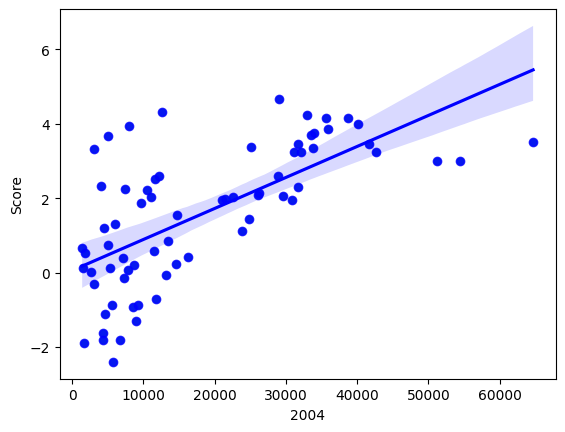

In [9]:
sns.scatterplot(data=merged_df, x='2004', y='Score')
sns.regplot(data=merged_df, x='2004', y='Score', scatter=True, color='blue')  # adds trendline
plt.show()

<span style="color:red">**Analysis of the scatter plot.**</span>

Let's take a look at the blue line (called a **trend line**), we notice that the trend line is slanted slightly upwards, this would imply that there is a slight positive correlation between GDP Per Capita (a proxy for wealth in this case) and the Happiness Score. On top of that, we notice a large number of points near the bottom left corner, these are countries with very weak GDP per capitas and with very low happiness score.

So far, it seems as though wealth really is one of the biggest predictors of happiness, however, upon taking a closer look at the individual points, we can make some interesting remarks.

While it is true that countries with higher GDP per capita tend to be happier generally, and that countries with lower GDP per capita are less happy on average, we notice some interesting outliers, especially when we compare the ultra-high GDP per capita countries (like Singapore with a GDP per Capita of *54000* USD and a Happiness Score of *3*) with some low GDP per capita countries like Colombia that has a GDP per capita of around *7900* USD (Purchasing Power Adjusted) and a high Happiness score of *3.94*.

If it were just one or two countries with low wealth but high happiness, we could dismiss it. After all, outliers are always bound to exist. However, there is a surprisingly large number of countries with low wealth with higher happiness than other countries with higher wealth.

**This would seem to imply that there is a bigger factor (or many factors) at play here than wealth, a factor that we just aren't quite aware of yet.** It might also be true that these factors are connected in some way or another with wealth, and that the reason that wealth is predictive of happiness isn't because it's the wealth that's actually making a difference, but that wealth is connected to another factor that is actually the driver of happiness. This is all speculation (as of now) of course, but we will dive deeper in this later.

Now, let's analyze this data in a more numerical way, rather than just visually.

In [10]:
#Let's take a look at the correlation.
merged_df[['2004','Score']].corr()

,2004,Score
2004,1.000000,0.663616
Score,0.663616,1.000000


**We notice a 66% correlation between score and the GDP Per Capita in these databases (from 2004)**

This means that there is a **moderate correlation** between wealth and happiness, this is in line with the plot where we can see a trend line with a slope that is slightly **positive**.

In other words, while richer countries do tend to be happier on **average**, it isn't a general truth that higher wealth will always lead to more happiness.

In [11]:
#Let's take a look at the countries with high happiness scores (greater than 3)
#They will be ordered from lowest to highest on score.
merged_df[merged_df['Score']>3].groupby('Score').max()

,Country,2004
Score,,
3.01,Saudi Arabia,51225.309265
3.23,Finland,32063.982695
3.25,Norway,42672.937535
3.32,Nigeria,3111.140160
3.36,Sweden,33809.385497
3.39,New Zealand,25096.685878
3.46,Australia,31763.796093
3.47,United States,41724.641198
3.52,Luxembourg,64694.433416


This again is simply another confirmation of what has already been stated before, **there is a surprisingly large number of countries with low/very low wealth but with high happiness and outperforming wealthy countries in terms of happiness.**

One stands out in particular, Nigeria has a very low GDP Per capita of roughly **3000 dollars**, yet its happiness score remains **higher** than some of the wealthiest countries in the world like Saudi Arabia and some of the Scandinavian countries.

<span style="color:red">***Conclusion:***</span>

Wealthier countries tend to be happier on average, however, the correlation between wealth and happiness doesn't seem to be as big as one might expect, given that the value for the correlation is only 67%.

On top of that, the existence of wild outliers like Nigeria and Columbia and many others seems to suggest the existence of another factor (or multiple) that have higher impacts on happiness.

<span style="color:red">***Methodological Flaws and Limitations:***</span>

-GDP per capita, while is often correlated with average wealth in a country, isn't always an accurate representation of wealth. 

-The happiness scores are the result of a survey, in which people from all over the world were asked to rate their overall happiness and satisfaction with their lives subjectively.

-The sample size of the survey from the WVS is limited to only 82 countries, thus the overall size of the merged data can only be 82 countries at most, which is less than half of the total number of countries in the world. This (relatively) small sample size might cause some inaccuracies in our generalization of the data.

-Outdated data (2004)

<span style="color:red">***What next?***</span>

First, we'll analyze more data in another Juypter Notebook to confirm the accuracy of our conclusions in this one. We must make sure to use data that addresses the current flaws (Small sample size and the use of GDP per capita as a proxy for wealth.)

Then the next and final step is to determine what are the biggest factors (which might include wealth) that lead to higher happiness.